# Calculus Sample Problem I

<u>Problem</u>:
Visualize the approximation of the integral of the sine function using left and right endpoint methods

1. Import necessary libraries for data manipulation and plotting.
2. Define constants like 5, interval, and components for the range of integration and number of subintervals.
3. Create two lists, R_subintervals and L_subintervals, representing the right and left endpoints for each subinterval.
4. Define a function endpoints that calculates the endpoints, sine values at those points, and labels them as either "L" (left) or "R" (right).
5. Call this function to generate data frames (df_L and df_R) for left and right endpoints.
6. Concatenate these data frames into one (df).
7. Set up a Matplotlib plot (fig, ax = plt.subplots()).
8. Define a function change_width to adjust the width of the bars in the plot.
9. Plot the sine function using Seaborn's scatterplot and barplot functions.
10. Plot the actual sine curve using Seaborn's lineplot.
11. Finally, show the plot.

The plot displays:

- Points for the left and right endpoints
- Bars at those points to approximate the area under the curve
- The actual sine curve

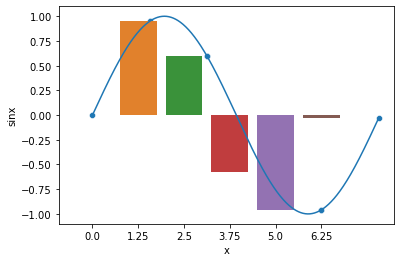

In [326]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

m=5
interval = [0, m] ## range
components=4

R_subintervals, L_subintervals = [1,2,3,4,5], [0,1,2,3,4] ## 5 equal components
delta_x = m/components

def endpoints(subintervals, end, components=4, m=5):
    endpoints_d={}
    delta_x = m/components ## width of bars
    for n in subintervals:
        x = (delta_x)*n
        endpoints_d[n] = {"n":n,"x":x,"sinx":np.sin(x),"end":end}
    return endpoints_d

##-- Left & Right Endpoints

L_endpoints = endpoints(L_subintervals,"L")
R_endpoints = endpoints(R_subintervals,"R")

df_L = pd.DataFrame(L_endpoints).T
df_R = pd.DataFrame(R_endpoints).T
df = pd.concat([df_L,df_R],join="outer")

df["sinx"] = df["sinx"].astype(np.float64)
df["x"] = df["x"].astype(np.float64)

fig, ax = plt.subplots()

def change_width(ax, new_value):
    for patch in ax.patches:
        current_width = patch.get_width()
        diff = current_width - new_value
        
        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .05)

ax.set(xticks=(-0.1,-1))

sns.scatterplot(x="x",y="sinx",data=df,ax=ax)
sns.barplot(x="x",y="sinx",data=df,ax=ax)

x2 = np.arange(0.01,6.25,0.01)
y2 = np.sin(x2)
sns.lineplot(x=x2,y=y2,ax=ax)

plt.show()